In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle, islice
import matplotlib.colors as mcolors
import matplotlib as mpl
import matplotlib.cm as cm
import cubehelix
from scipy import stats
import matplotlib as mpl
label_size = 16
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size

In [3]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
source = pd.read_csv('linear_regression_data.csv', index_col=0)
source.insert(0, 'Chi_av', (source['Chi_a']+source['Chi_c'])/2)
source.insert(0,'Ds',(source['vbm']+source['IP']))
source.insert(0,'inv_area',(1/source['Area']))
source.insert(0,'Chi_diff', source['Chi_a']-source['Chi_c'])
source.insert(0,'inv_dielec',1/source['Dielectric'])
source.insert(0,'surf_num',source['na']*2)

In [5]:
source.head()
print len(source)

19


In [6]:
est_av = smf.ols(formula='Ds ~ Chi_av + inv_area + surf_num + Dielectric', data=source).fit()
est_diff = smf.ols(formula='Ds ~ Chi_diff + inv_area + surf_num + Dielectric', data=source).fit()

In [7]:
est_av.summary()

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/scipy/stats/stats.py:1293: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Ds   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     104.6
Date:                Thu, 05 Nov 2015   Prob (F-statistic):           2.90e-10
Time:                        15:49:41   Log-Likelihood:                -11.939
No. Observations:                  19   AIC:                             33.88
Df Residuals:                      14   BIC:                             38.60
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     17.6891      1.846      9.583      0.000        13.730    21.648
Chi_av       -10.7680      0.639    -16.855      0.000       -12.138    -9.398
inv_area     217.6977     14.898     14.612      0.000       185.744   249.651
surf_num       0.7523      0.229      3.287      0.005         0.261     1.243
Dielectric     0.1194      0.046      2.589      0.021         0.020     0.218
==============================================================================
Omnibus:                        3.778   Durbin-Watson:                   1.537
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                1.745
Skew:                          -0.587   Prob(JB):                        0.418
Kurtosis:                       3.910   Cond. No.                     1.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
def surface_dipole(Chi_av,area,surf_num,dielec):
    return 17.6891   - 10.7680  * Chi_av +   217.6977  / area + 0.7523 * surf_num + 0.1194  * dielec 

In [53]:
source.head()

,surf_num,inv_dielec,Chi_diff,inv_area,Ds,Chi_av,Chi_a,Chi_c,r_a,r_c,na,nc,Area,Dielectric,vbm,IP,comment
Name,,,,,,,,,,,,,,,,,
ZnO-O,2,0.106720,1.79,0.067889,6.44,2.545,3.44,1.65,0.66,1.22,1,1,14.73,9.370290,1.0603,5.3797,NaN
Zns-O,2,0.140394,0.93,0.067889,12.46,2.115,2.58,1.65,1.05,1.22,1,1,14.73,7.122794,8.4411,4.0189,NaN
ZnSe-O,2,0.119620,0.90,0.067889,13.18,2.100,2.55,1.65,1.20,1.22,1,1,14.73,8.359822,9.8231,3.3569,NaN
ZnO-S,2,0.182315,1.79,0.049237,3.68,2.545,3.44,1.65,0.66,1.22,1,1,20.31,5.485000,-2.0720,5.7520,NaN
ZnS-S,2,0.164994,0.93,0.049237,7.56,2.115,2.58,1.65,1.05,1.22,1,1,20.31,6.060833,2.2657,5.2943,NaN


In [54]:
IP_PBE = []; IP_model = []
for i, value in enumerate(source['Ds']):
    IP_PBE.append(source['IP'][i])
    IPe = surface_dipole(source['Chi_av'][i],source['Area'][i],source['na'][i]*2,source['Dielectric'][i]) - source['vbm'][i]
    IP_model.append(IPe)

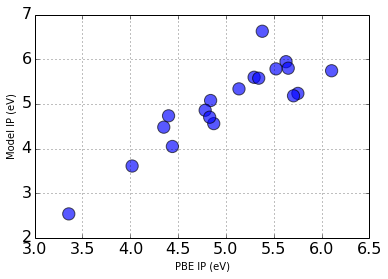

In [55]:
plt.scatter(IP_PBE,IP_model,marker='o',s=150, alpha=0.65)
plt.grid(True)
plt.xlabel('PBE IP (eV)')
plt.ylabel('Model IP (eV)')

## Test the model

In [21]:
test_data = pd.read_csv('testing_data.csv', index_col=0)

In [22]:
test_data.insert(0, 'tChi_av', (test_data['Chi_a']+test_data['Chi_c'])/2)
test_data.insert(0,'tDs',(test_data['vbm']+test_data['IP']))
test_data.insert(0,'tinv_area',(1/test_data['Area']))
test_data.insert(0,'dChi',(test_data['Chi_a']-test_data['Chi_c']))

In [25]:
IP_III_V = []; mIP_III_V = []; IP_II_VI = []; mIP_II_VI = []; IP_O = []; mIP_O = [];est_IP = []
for i in range(0,13):
    IP_II_VI.append(test_data['IP'][i])
    IPe = surface_dipole(test_data['tChi_av'][i],test_data['Area'][i],test_data['na'][i]*2,test_data['Dielectric'][i]) - test_data['vbm'][i]
    mIP_II_VI.append(IPe)
    est_IP.append(IPe)
for i in range(13,22):
    IP_O.append(test_data['IP'][i])
    IPe = surface_dipole(test_data['tChi_av'][i],test_data['Area'][i],test_data['na'][i]*2,test_data['Dielectric'][i]) - test_data['vbm'][i]
    mIP_O.append(IPe) 
    est_IP.append(IPe)
for i in range(22,31):
    IP_III_V.append(test_data['IP'][i])
    IPe = surface_dipole(test_data['tChi_av'][i],test_data['Area'][i],test_data['na'][i]*2,test_data['Dielectric'][i]) - test_data['vbm'][i]
    mIP_III_V.append(IPe)
    est_IP.append(IPe)

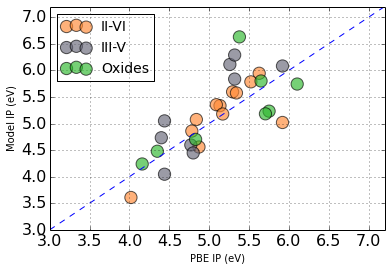

In [26]:
eyeline_x=np.arange(3,9)
b_lower = eyeline_x-0.5
b_upper =eyeline_x+0.5
ax.fill_between(eyeline_x,b_lower,b_upper,alpha = 0.3)
plt.scatter(IP_II_VI,mIP_II_VI,marker='o',s=150, alpha=0.65,c='#ff8833',label='II-VI')
plt.scatter(IP_III_V,mIP_III_V,marker='o',s=150, alpha=0.65,c='#666677',label='III-V')
plt.scatter(IP_O,mIP_O,marker='o',s=150, alpha=0.65,c='#2EB82E',label='Oxides')
plt.grid(True)
plt.legend()
eyeline_x=np.arange(3,9)
plt.plot(eyeline_x,eyeline_x,'--',c='b')

plt.ylim(3,7.2)
plt.legend(loc=2, fontsize=14)
plt.xlabel('PBE IP (eV)')
plt.ylabel('Model IP (eV)')

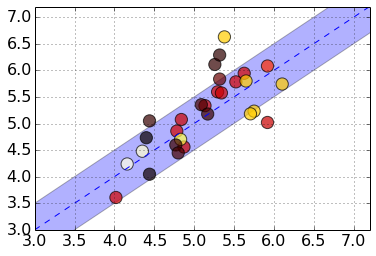

In [76]:
fig, ax = plt.subplots()
eyeline_x=np.arange(3,9)
b_lower = eyeline_x-0.5
b_upper =eyeline_x+0.5
ax.fill_between(eyeline_x,b_lower,b_upper,alpha = 0.3)
ax.scatter(test_data['IP'][:31],est_IP,s=150,c=test_data['dChi'][:31],alpha=0.7,cmap=cm.hot)
ax.set_xlim(3,7.2)
ax.set_ylim(3,7.2)
ax.grid(True)


# Colourbar
#cax = ax.imshow(test_data['dChi'], interpolation='nearest', cmap=cm.coolwarm)
#cbar = fig.colorbar(cax)

ax.plot(eyeline_x,eyeline_x,'--',c='b')

In [72]:
surface_dipole((1.+2.55)/2,34.49,4,5) - 2.49

6.0040077993621335

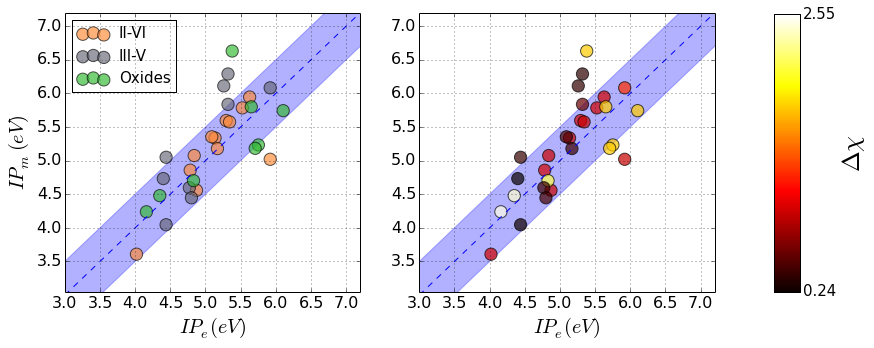

In [124]:
# Four axes, returned as a 2-d array
f, axarr = plt.subplots(1, 3)
f.set_size_inches(18,5)
#  Left 
eyeline_x=np.arange(3,9)
b_lower = eyeline_x-0.5
b_upper =eyeline_x+0.5
axarr[0].fill_between(eyeline_x,b_lower,b_upper,alpha = 0.3,color='b')
axarr[0].scatter(IP_II_VI,mIP_II_VI,marker='o',s=150, alpha=0.65,c='#ff8833',label='II-VI')
axarr[0].scatter(IP_III_V,mIP_III_V,marker='o',s=150, alpha=0.65,c='#666677',label='III-V')
axarr[0].scatter(IP_O,mIP_O,marker='o',s=150, alpha=0.65,c='#2EB82E',label='Oxides')
axarr[0].grid(True)
axarr[0].legend(loc='upper left',fontsize=15)
axarr[0].plot(eyeline_x,eyeline_x,'--',c='b')
axarr[0].set_xlim(3.,7.2)
axarr[0].set_ylim(3.05,7.2)
axarr[0].set_xlabel('$IP_e (eV)$',fontsize=20)
axarr[0].set_ylabel('$IP_m (eV)$',fontsize=20)

# Right
eyeline_x=np.arange(3,9)
b_lower = eyeline_x-0.5
b_upper =eyeline_x+0.5
axarr[1].fill_between(eyeline_x,b_lower,b_upper,alpha = 0.3,color='b')
axarr[1].scatter(test_data['IP'][:31],est_IP,s=150,c=test_data['dChi'][:31],alpha=0.7,cmap=cm.hot)
axarr[1].set_xlim(3,7.2)
axarr[1].set_ylim(3.05,7.2)
axarr[1].grid(True)
axarr[1].plot(eyeline_x,eyeline_x,'--',c='b')
axarr[1].set_xlabel('$IP_e (eV)$',fontsize=20)


#print axarr[2].get_position()
# Colourbar
norm = mpl.colors.Normalize(vmin=min(test_data['dChi'][:31]),vmax=max(test_data['dChi'][:31]))
axarr[2].set_position((0.67205882, 0.125, 0.02, 0.77))
cb1 = mpl.colorbar.ColorbarBase(axarr[2], cmap=cm.hot,norm=norm,
                                ticks=[min(test_data['dChi'][:31]),max(test_data['dChi'][:31])],
                                orientation='vertical')
cb1.set_label('$\Delta \chi $',size=25)
cb1.ax.set_yticklabels([min(test_data['dChi'][:31]),max(test_data['dChi'][:31])],size=15)
f.savefig('model_expt_IP.pdf')
#f.tight_layout()
plt.show()